In [51]:
import os
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer
from rdkit import Chem
import rdkit
import random

class CFG:
    model = 't5'
    dataset_path = 'multiinput_prediction_output.csv'
    model_name_or_path = '/home/acf15718oa/ReactionT5_neword/forward_reaction_prediction_drop_dup/finetuning_lr2e-5_20epoch_maxinput200/t5/checkpoint-102264'
    num_beams = 5
    num_return_sequences = 5
    debug = True
    seed = 42
    
device = 'cpu'

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything(seed=CFG.seed)  
    

# dataset = pd.read_csv(CFG.dataset_path)

tokenizer = AutoTokenizer.from_pretrained(CFG.model_name_or_path, return_tensors='pt')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [52]:
df = pd.read_csv('/home/acf15718oa/ReactionT5_neword/forward_reaction_prediction_drop_dup/finetuning_lr2e-5_20epoch_maxinput200_sample100/output.csv')
seed_everything(seed=CFG.seed)  
df['target'] = pd.read_csv('/home/acf15718oa/ReactionT5_neword/data/USPTO_MIT/MIT_separated/test.csv')['PRODUCT']
df

input  \
0      REACTANT:N#Cc1ccsc1N.O=[N+]([O-])c1cc(F)c(F)cc...   
1      REACTANT:COC(=O)Cc1cn(C)c2cc(O)ccc12.Cc1nn(-c2...   
2      REACTANT:Cl.NC1CCN(CC2Cn3c(=O)ccc4ncc(F)c2c43)...   
3      REACTANT:C=C(C)C(=O)Cl.CC(C)=C1C(=O)N(c2ccc(O)...   
4      REACTANT:O=Cc1cncc(Cl)c1COC1CCCCO1REAGENT:OCc1...   
...                                                  ...   
39995  REACTANT:COC(=O)NCC1Cc2c(Cl)cc3c(c2O1)CCC3REAG...   
39996  REACTANT:COc1cccc(C(=O)Cl)c1.COc1ccccc1OCREAGE...   
39997  REACTANT:C#Cc1cccc(C2C(C(=O)OC)=C(C)NC(C(OC)OC...   
39998  REACTANT:CO.COc1ccc(CC(=O)c2ccc(O)cc2O)cc1REAG...   
39999  REACTANT:CC(=O)O.OCc1cccc(Cl)c1REAGENT:Cc1ccc(...   

                                                     0th  \
0                  N#Cc1ccsc1Nc1cc(F)c(F)cc1[N+](=O)[O-]   
1      COC(=O)Cc1cn(C)c2cc(OCC(C)c3cn(-c4ccc(C(F)(F)F...   
2      Cl.O=c1ccc2ncc(F)c3c2n1CC3CN1CC[C@@H](NCc2cc3c...   
3      C=C(C)C(=O)Oc1ccc(N2C(=O)C(=C(C)C)C(=C(C)c3cc(...   
4                               OCc1cncc(Cl)c1COC1CCCCO1   
...                                                  ...   
39995                        CNCC1Cc2c(Cl)cc3c(c2O1)CCC3   
39996                  COc1cccc(C(=O)c2ccc(OC)c(OC)c2)c1   
39997    C#Cc1cccc(C2C(C(=O)OC)=C(C)NC(C=O)=C2C(=O)OC)c1   
39998                         COc1ccc(CCc2ccc(O)cc2O)cc1   
39999                               CC(=O)OCc1cccc(Cl)c1   

                                                     1th  \
0      N#CC1=CC=CSC1(Nc1cc(F)c(F)cc1[N+](=O)[O-])[N+]...   
1      COC(=O)Cc1cn(C)c2cc(OCCc3cn(-c4ccc(C(F)(F)F)cc...   
2      Cl.O=c1ccc2ncc(F)c3c2n1CC3CN1CC[C@H](NCc2cc3c(...   
3      C=C(C)C(=O)Oc1ccc(N2C(=O)C(=C(C)C)/C(=C(/C)c3c...   
4             OC(OCc1c(Cl)cncc1Cl)c1cncc(Cl)c1COC1CCCCO1   
...                                                  ...   
39995                     CNCC1Cc2c(Cl)cc3c(c2O1)CCC3.Cl   
39996  COc1cccc(C(=O)c2ccc(OC)c(OC)c2)c1.COc1cccc(C(=...   
39997  C#Cc1cccc(C2(C(=O)OC)C(C(=O)OC)=C(C)NC(C=O)=C2...   
39998                      COc1ccc(CC(O)c2ccc(O)cc2O)cc1   
39999                                O=C(O)Cc1cccc(Cl)c1   

                                                     2th  \
0      N#CC1=CCSC1(Nc1cc(F)c(F)cc1[N+](=O)[O-])[N+](=...   
1      COC(=O)Cc1c(C)n(-c2ccc(C(F)(F)F)cc2)cc1C(C)COc...   
2      Cl.O=c1ccc2ncc(F)c3c2n1CC3CN1CCC(NCc2cc3c(cn2)...   
3      C=C(C)C(=O)Oc1ccc(N2C(=O)C(=C(C)C)/C(=C(\C)c3c...   
4        OCc1cncc(Cl)c1COC1CCCCO1)c1cncc(Cl)c1COC1CCCCO1   
...                                                  ...   
39995                    CNC[C@H]1Cc2c(Cl)cc3c(c2O1)CCC3   
39996   COc1cccc(C(=O)c2ccc(C(=O)c3cccc(OC)c3)c(OC)c2)c1   
39997  C#Cc1cccc(C2C(C(=O)OC)=C(C)Nc3cc(C(=O)OC)c(C)n...   
39998                   COc1ccc(-c2coc3cc(O)ccc3c2=O)cc1   
39999                       CC(=O)OCc1cccc(Cl)c1.CC(=O)O   

                                                     3th  \
0                  N#Cc1ccsc1Nc1ccc(F)c(F)c1[N+](=O)[O-]   
1      COC(=O)Cc1cn(C)c2cc(OC[C@@H](C)c3cn(-c4ccc(C(F...   
2      Cl.Cl.O=c1ccc2ncc(F)c3c2n1CC3CN1CC[C@@H](NCc2c...   
3      C=C(C)C(=O)Oc1ccc(N2C(=O)C(=C(C)C)C(=C(C)c4cc(...   
4      OCc1cncc(Cl)c1COC1CCCCO1.OCc1cncc(Cl)c1COC1CCCCO1   
...                                                  ...   
39995                        CNCc1cc2c(Cl)cc3c(c2o1)CCC3   
39996  COc1cccc(C(=O)c2ccc(OC)c(OC)c2)c1)c1ccc(OC)c(O...   
39997  C#Cc1cccc(C2C(C(=O)OC)=C(C)Nc3cc(C(=O)OC)cnc32)c1   
39998                     COc1ccc(OCC(O)c2ccc(O)cc2O)cc1   
39999                             CC(=O)O.OCc1cccc(Cl)c1   

                                                     4th     0th score  \
0         N#CC1=CCSC1(Nc1cc(F)c(F)cc1[N+](=O)[O-])C(N)=O  0.000000e+00   
1      COC(=O)Cc1c(C)n(-c2ccc(C(F)(F)F)cc2)cc1C(C)COc...  0.000000e+00   
2      Cl.O=c1ccc2ncc(F)c3c2n1C[C@@H]3CN1CC[C@H](NCc2... -8.228888e-04   
3      C=C(C)C(=O)Oc1ccc(N2C(=O)C(=C(C)C)C(=C(C)c3cc(...  0.000000e+00   
4              OCc1cncc(Cl)c1COC1CCCCO1)OCc1c(Cl)cncc1Cl  0.000000e+00   
..

In [53]:
from rdkit import Chem
def canonicalize(mol):
    mol = Chem.MolToSmiles(Chem.MolFromSmiles(mol),True)
    return mol
i = 40
canonicalize(df['target'][i]),Chem.CanonSmiles(df['target'][i])

('COC(=O)C1(OC)CC(C)C(=O)C(C(=O)c2ccc(C(F)(F)F)nc2C)=C1O',
 'COC(=O)C1(OC)CC(C)C(=O)C(C(=O)c2ccc(C(F)(F)F)nc2C)=C1O')

In [54]:
def remove_space(row):
    for i in range(5):
        row[f'{i}th'] = row[f'{i}th'].replace(' ', '')
#     row['valid compound'] = row['valid compound'].replace(' ', '')
    return row
df = df.apply(remove_space, axis=1)

In [55]:
def canonicalize2(mol):
    try:
        return canonicalize(mol)
    except:
        return None

In [56]:
top_k_invalidity = 5

top1, top2, top3, top5 = [], [], [], []
invalidity = []

for idx, row in df.iterrows():
    target = canonicalize(row['target'])
    if canonicalize2(row['0th']) == target:
        top1.append(1)
        top2.append(1)
        top3.append(1)
        top5.append(1)
    elif canonicalize2(row['1th']) == target:
        top1.append(0)
        top2.append(1)
        top3.append(1)
        top5.append(1)
    elif canonicalize2(row['2th']) == target:
        top1.append(0)
        top2.append(0)
        top3.append(1)
        top5.append(1)
    elif canonicalize2(row['3th']) == target:
        top1.append(0)
        top2.append(0)
        top3.append(0)
        top5.append(1)
    elif canonicalize2(row['4th']) == target:
        top1.append(0)
        top2.append(0)
        top3.append(0)
        top5.append(1)
    else:
        top1.append(0)
        top2.append(0)
        top3.append(0)
        top5.append(0)

        
    input_compound = row['input']
    output = [row[f'{i}th'] for i in range(top_k_invalidity)]
    inval_score = 0
    for ith, out in enumerate(output):
        mol = Chem.MolFromSmiles(out.rstrip('.'))
        if type(mol) != rdkit.Chem.rdchem.Mol:
            inval_score += 1
    invalidity.append(inval_score)
df['top1_accuracy'] = top1
df['top2_accuracy'] = top2
df['top3_accuracy'] = top3
df['top5_accuracy'] = top5
df['invalidity'] = invalidity

[11:03:30] SMILES Parse Error: extra open parentheses for input: 'C=C(C)C(=O)Oc1ccc(N2C(=O)C(=C(C)C)C(=C(C)c3cc(-c4ccccc4)sc3C'
[11:03:30] SMILES Parse Error: extra close parentheses while parsing: OCc1cncc(Cl)c1COC1CCCCO1)c1cncc(Cl)c1COC1CCCCO1
[11:03:30] SMILES Parse Error: Failed parsing SMILES 'OCc1cncc(Cl)c1COC1CCCCO1)c1cncc(Cl)c1COC1CCCCO1' for input: 'OCc1cncc(Cl)c1COC1CCCCO1)c1cncc(Cl)c1COC1CCCCO1'
[11:03:30] SMILES Parse Error: extra close parentheses while parsing: OCc1cncc(Cl)c1COC1CCCCO1)OCc1c(Cl)cncc1Cl
[11:03:30] SMILES Parse Error: Failed parsing SMILES 'OCc1cncc(Cl)c1COC1CCCCO1)OCc1c(Cl)cncc1Cl' for input: 'OCc1cncc(Cl)c1COC1CCCCO1)OCc1c(Cl)cncc1Cl'
[11:03:30] SMILES Parse Error: extra close parentheses while parsing: COc1ncc(Nc2ncc(CN3CCNS(C)(=O)=O)cc3-c3nc(C)nc(N)n3)cc2F)cc1F
[11:03:30] SMILES Parse Error: Failed parsing SMILES 'COc1ncc(Nc2ncc(CN3CCNS(C)(=O)=O)cc3-c3nc(C)nc(N)n3)cc2F)cc1F' for input: 'COc1ncc(Nc2ncc(CN3CCNS(C)(=O)=O)cc3-c3nc(C)nc(N)n3)cc2F)cc1F'
[11:0

In [57]:
df.head()

input  \
0  REACTANT:N#Cc1ccsc1N.O=[N+]([O-])c1cc(F)c(F)cc...   
1  REACTANT:COC(=O)Cc1cn(C)c2cc(O)ccc12.Cc1nn(-c2...   
2  REACTANT:Cl.NC1CCN(CC2Cn3c(=O)ccc4ncc(F)c2c43)...   
3  REACTANT:C=C(C)C(=O)Cl.CC(C)=C1C(=O)N(c2ccc(O)...   
4  REACTANT:O=Cc1cncc(Cl)c1COC1CCCCO1REAGENT:OCc1...   

                                                 0th  \
0              N#Cc1ccsc1Nc1cc(F)c(F)cc1[N+](=O)[O-]   
1  COC(=O)Cc1cn(C)c2cc(OCC(C)c3cn(-c4ccc(C(F)(F)F...   
2  Cl.O=c1ccc2ncc(F)c3c2n1CC3CN1CC[C@@H](NCc2cc3c...   
3  C=C(C)C(=O)Oc1ccc(N2C(=O)C(=C(C)C)C(=C(C)c3cc(...   
4                           OCc1cncc(Cl)c1COC1CCCCO1   

                                                 1th  \
0  N#CC1=CC=CSC1(Nc1cc(F)c(F)cc1[N+](=O)[O-])[N+]...   
1  COC(=O)Cc1cn(C)c2cc(OCCc3cn(-c4ccc(C(F)(F)F)cc...   
2  Cl.O=c1ccc2ncc(F)c3c2n1CC3CN1CC[C@H](NCc2cc3c(...   
3  C=C(C)C(=O)Oc1ccc(N2C(=O)C(=C(C)C)/C(=C(/C)c3c...   
4         OC(OCc1c(Cl)cncc1Cl)c1cncc(Cl)c1COC1CCCCO1   

                                                 2th  \
0  N#CC1=CCSC1(Nc1cc(F)c(F)cc1[N+](=O)[O-])[N+](=...   
1  COC(=O)Cc1c(C)n(-c2ccc(C(F)(F)F)cc2)cc1C(C)COc...   
2  Cl.O=c1ccc2ncc(F)c3c2n1CC3CN1CCC(NCc2cc3c(cn2)...   
3  C=C(C)C(=O)Oc1ccc(N2C(=O)C(=C(C)C)/C(=C(\C)c3c...   
4    OCc1cncc(Cl)c1COC1CCCCO1)c1cncc(Cl)c1COC1CCCCO1   

                                                 3th  \
0              N#Cc1ccsc1Nc1ccc(F)c(F)c1[N+](=O)[O-]   
1  COC(=O)Cc1cn(C)c2cc(OC[C@@H](C)c3cn(-c4ccc(C(F...   
2  Cl.Cl.O=c1ccc2ncc(F)c3c2n1CC3CN1CC[C@@H](NCc2c...   
3  C=C(C)C(=O)Oc1ccc(N2C(=O)C(=C(C)C)C(=C(C)c4cc(...   
4  OCc1cncc(Cl)c1COC1CCCCO1.OCc1cncc(Cl)c1COC1CCCCO1   

                                                 4th  0th score  1th score  \
0     N#CC1=CCSC1(Nc1cc(F)c(F)cc1[N+](=O)[O-])C(N)=O   0.000000  -0.341102   
1  COC(=O)Cc1c(C)n(-c2ccc(C(F)(F)F)cc2)cc1C(C)COc...   0.000000  -0.343018   
2  Cl.O=c1ccc2ncc(F)c3c2n1C[C@@H]3CN1CC[C@H](NCc2...  -0.000823  -0.058293   
3  C=C(C)C(=O)Oc1ccc(N2C(=O)C(=C(C)C)C(=C(C)c3cc(...   0.000000  -0.311427   
4          OCc1cncc(Cl)c1COC1CCCCO1)OCc1c(Cl)cncc1Cl   0.000000  -0.576790   

   2th score  3th score  4th score  \
0  -0.370492  -0.566659  -0.606241   
1  -0.384923  -0.390093  -0.393552   
2  -0.068943  -0.220431  -0.234929   
3  -0.374138  -0.383519  -0.435180   
4  -0.726139  -0.839929  -0.841516   

                                              target  top1_accuracy  \
0              N#Cc1ccsc1Nc1cc(F)c(F)cc1[N+](=O)[O-]              1   
1  COC(=O)Cc1cn(C)c2cc(OCC(C)c3cn(-c4ccc(C(F)(F)F...              1   
2  O=c1ccc2ncc(F)c3c2n1CC3CN1CCC(NCc2cc3c(cn2)OCS...              0   
3  C=C(C)C(=O)Oc1ccc(N2C(=O)C(=C(C)C)C(=C(C)c3cc(...              1   
4                           OCc1cncc(Cl)c1COC1CCCCO1              1   

   top2_accuracy  top3_accuracy  top5_accuracy  invalidity  
0              1              1              1           0  
1              1              1              1           0  
2              0              0              0           0  
3              1              1              1           1  
4              1              1              1           2

In [58]:
print(sum(df['top1_accuracy']) / len(df), sum(df['top2_accuracy']) / len(df), sum(df['top3_accuracy']) / len(df), sum(df['top5_accuracy']) / len(df))
print(sum(invalidity)/(len(invalidity)*top_k_invalidity)*100)

0.92985 0.95755 0.965 0.9716
12.573


In [6]:
df = pd.read_csv('/home/acf15718oa/ReactionT5_neword/data/USPTO_MIT/MIT_separated/train.csv')
df['target_token_length'] = df["PRODUCT"].apply(lambda x: len(tokenizer(x).input_ids))
df['target_token_length'].describe()

count    409035.000000
mean         36.474998
std          14.947886
min           2.000000
25%          25.000000
50%          35.000000
75%          46.000000
max         181.000000
Name: target_token_length, dtype: float64

In [9]:
df['reactant_token_length'] = df["REACTANT"].apply(lambda x: len(tokenizer(x).input_ids))
df['reagent_token_length'] = df["REAGENT"].apply(lambda x: len(tokenizer(x).input_ids) if type(x) == str else 1)
df['input_token_length'] = df['reactant_token_length'] + df['reagent_token_length']
df['input_token_length'].describe()

count    409035.000000
mean         64.929764
std          29.139865
min           6.000000
25%          46.000000
50%          60.000000
75%          77.000000
max         288.000000
Name: input_token_length, dtype: float64

<Axes: >

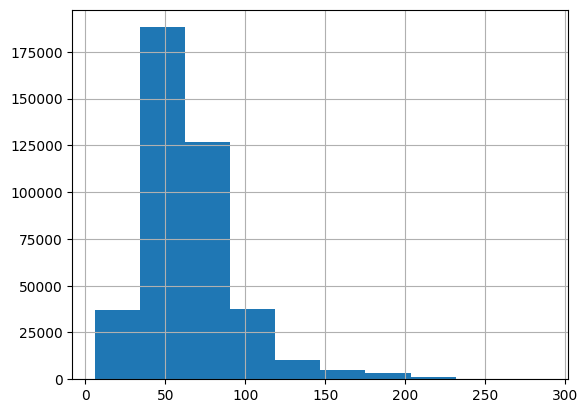

In [10]:
import matplotlib.pyplot as plt
df['input_token_length'].hist()

<Axes: >

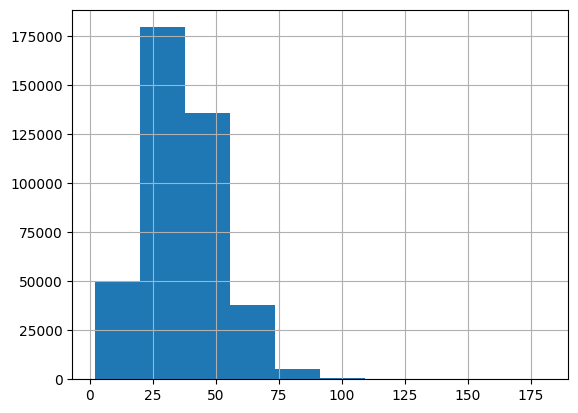

In [11]:
df['target_token_length'].hist()